# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Dataset

In [2]:
df_places = pd.read_csv('./places_lille.csv')
df_places.head()

,id,nom,nbAvis,latitude,longitude,shape_gid,gtrip
0,3536508,BEST WESTERN PREMIER Why Hotel,867,50.634180,3.061462,52094,187178
1,3155436,La Maison du Champlain,60,50.630013,3.061325,52094,187178
2,1803869,Au Clos Notre Dame,56,50.640160,3.061802,52094,187178
3,196911,Novotel Lille Centre Grand Place,808,50.637000,3.058622,52094,187178
4,289349,"L Hermitage Gantois, Autograph Collection",824,50.631294,3.068347,52094,187178


C:\Users\yh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


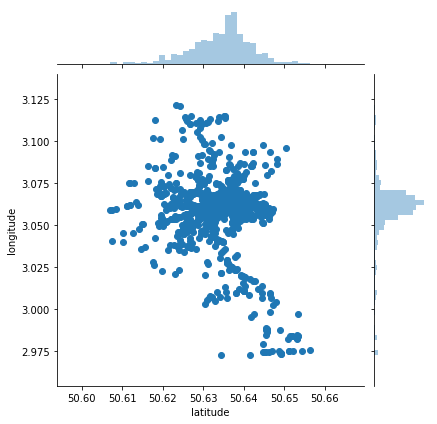

In [3]:
sns.jointplot(x=df_places['latitude'], y=df_places['longitude'], kind='scatter')

# Analysis 

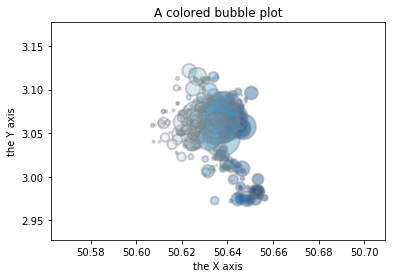

In [4]:
# create data
x = df_places['latitude']
y = df_places['longitude']
z = df_places['nbAvis']

# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z, c=x, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.title("A colored bubble plot")
 
plt.show()

In [5]:
import folium

print(folium.__version__)

0.7.0


In [6]:
from folium.plugins import HeatMap

m = folium.Map([50.633333,3.066667], zoom_start=13)

HeatMap(df_places[['latitude', 'longitude', 'nbAvis']].values.tolist()).add_to(m)

#m.save(os.path.join('results', 'Heatmap.html'))

m

In [7]:
df_reviews = pd.read_csv('./reviews_lille.csv')
df_reviews.head()

,id,idplace,idauteur,note,date_review,date_visit,langue
0,335723563,3536508,5CD49A9AEED3521CAA497CAB08161758,5,2015-12-29,2015-12-01,fra
1,335577822,3536508,5BDED647AF9F48EFB79BFBABA079AB8E,4,2015-12-29,2015-12-01,fra
2,334659016,3536508,B60440567F6780CE13B16C64A5349027,5,2015-12-23,2015-12-01,fra
3,333825375,3536508,3F5C977D00256FADE840A4DE09CCEBDA,5,2015-12-19,2015-12-01,fra
4,333671022,3536508,9EDD36662B20DE72A39D22D67A5F3C35,5,2015-12-18,2015-11-01,fra


# Volume per place using reviews

In [8]:
nb_places = len(df_places)
nb_places

1426

In [9]:
df_tmp_places = df_places[["id", "latitude", "longitude"]]
df_tmp_places.head()

,id,latitude,longitude
0,3536508,50.634180,3.061462
1,3155436,50.630013,3.061325
2,1803869,50.640160,3.061802
3,196911,50.637000,3.058622
4,289349,50.631294,3.068347


In [10]:
tmp_volume = pd.DataFrame(index=df_tmp_places.index, columns=["volume"])

for i in range(nb_places):
    tmp_volume["volume"][i] = len(df_reviews[df_reviews["idplace"] == df_tmp_places["id"][i] ])

In [11]:
tmp_volume

,volume
0,871
1,70
2,59
3,814
4,833
5,162
6,23
7,435
8,614
9,24


# Using reviews in time

In [12]:
from datetime import datetime

In [13]:
def add_one_month(date):
    if date.month < 12 : 
        return date.replace(month=date.month+1)
    else :
        return date.replace(month=1, year=date.year+1)

In [14]:
df_tmp_places = df_places[["id", "latitude", "longitude"]]
df_tmp_places.reset_index(inplace=True,drop=True)
nb_places = len(df_tmp_places)
df_tmp_places.head()

,id,latitude,longitude
0,3536508,50.634180,3.061462
1,3155436,50.630013,3.061325
2,1803869,50.640160,3.061802
3,196911,50.637000,3.058622
4,289349,50.631294,3.068347


In [15]:
# BEGINNING DATE : 2002-11-03 - ENDING DATE : 2016-12-09
date_from = datetime.strptime('2003-11-01', '%Y-%m-%d')
date_to = add_one_month(date_from)

# periodic_volumes is an array containing all volumes for each place, each month
# periodic_volumes is an array of arrays : [ [[latitude, longitude, volume],... ], ... ]
periodic_volumes =[] 

# Loop for the right number of month between the beginning date and the ending date :
number_of_month = 170

for j in range(number_of_month) :
    print("j : "+str(j))
    
    # creating df volume
    tmp_volume = pd.DataFrame(index=df_tmp_places.index, columns=["volume"])
    for i in range(nb_places):
        
        tmp_selected_reviews = df_reviews[(df_reviews["idplace"] == df_tmp_places["id"][i]) 
                                         & (df_reviews["date_review"] != "0000-00-00")]
        
        # Reinitializing index of dataframe :
        tmp_selected_reviews.reset_index(inplace=True,drop=True)
        
        bool_period = pd.DataFrame(index=range(len(tmp_selected_reviews)), columns=["after", "before"])
        
        for k in range(len(tmp_selected_reviews)): 
            bool_period["after"][k] = datetime.strptime(str(tmp_selected_reviews["date_review"][k]), '%Y-%m-%d') >= date_from
            bool_period["before"][k] = datetime.strptime(str(tmp_selected_reviews["date_review"][k]), '%Y-%m-%d') < date_to

        tmp_volume["volume"][i] = len(tmp_selected_reviews[bool_period["after"] & bool_period["before"]])
        

    
    # fusion avec df places
    df_result = pd.concat([df_tmp_places[["latitude","longitude"]], tmp_volume],axis=1) 
    
    # conversion en array
    tmp_array = df_result[df_result['volume'] != 0].values.tolist()
    
    # ajout à l'array globale
    periodic_volumes.append(tmp_array)
    
    # incrementation du temps
    date_from = add_one_month(date_from)
    date_to = add_one_month(date_from)

    
# calculer les volume sur un mois, ranger ca dans une array, faire pareil pour les mois suivants


j : 0
j : 1
j : 2
j : 3
j : 4
j : 5
j : 6
j : 7
j : 8
j : 9
j : 10
j : 11
j : 12
j : 13
j : 14
j : 15
j : 16
j : 17
j : 18
j : 19
j : 20
j : 21
j : 22
j : 23
j : 24
j : 25
j : 26
j : 27
j : 28
j : 29
j : 30
j : 31
j : 32
j : 33
j : 34
j : 35
j : 36
j : 37
j : 38
j : 39
j : 40
j : 41
j : 42
j : 43
j : 44
j : 45
j : 46
j : 47
j : 48
j : 49
j : 50
j : 51
j : 52
j : 53
j : 54
j : 55
j : 56
j : 57
j : 58
j : 59
j : 60
j : 61
j : 62
j : 63
j : 64
j : 65
j : 66
j : 67
j : 68
j : 69
j : 70
j : 71
j : 72
j : 73
j : 74
j : 75
j : 76
j : 77
j : 78
j : 79
j : 80
j : 81
j : 82
j : 83
j : 84
j : 85
j : 86
j : 87
j : 88
j : 89
j : 90
j : 91
j : 92
j : 93
j : 94
j : 95
j : 96
j : 97
j : 98
j : 99
j : 100
j : 101
j : 102
j : 103
j : 104
j : 105
j : 106
j : 107
j : 108
j : 109
j : 110
j : 111
j : 112
j : 113
j : 114
j : 115
j : 116
j : 117
j : 118
j : 119
j : 120
j : 121
j : 122
j : 123
j : 124
j : 125
j : 126
j : 127
j : 128
j : 129
j : 130
j : 131
j : 132
j : 133
j : 134
j : 135
j : 136
j : 137
j : 13

In [16]:
#import folium
import folium.plugins as plugins

m = folium.Map([50.633333,3.066667], zoom_start=13)

hm = plugins.HeatMapWithTime(periodic_volumes)

hm.add_to(m)

#m.save(os.path.join('results', 'Heatmap.html'))

m

In [17]:
#m.save(os.path.join('results', 'Heatmap_Lille.html'))

# Calculating the intensity indicator

In [18]:
%run growth_value.ipynb

Function get_growth(date) is now available.


In [19]:
# BEGINNING DATE : 2002-11-03 - ENDING DATE : 2016-12-09
date_from = datetime.strptime('2003-11-01', '%Y-%m-%d')
date_to = add_one_month(date_from) 

area = 39.51 #km²
density = nb_places / area

# Loop for the right number of month between the beginning date and the ending date :
number_of_month = 170

df_intensity = pd.DataFrame(index=range(number_of_month), columns=["date","volume","intensity"])


for j in range(number_of_month) :
    print(j)
    
    # pour chaque mois 
    # on compte le nombre de reviews 
    # Selecting reviews with a valid date : 
    tmp_selected_reviews = df_reviews[(df_reviews["date_review"] != "0000-00-00")]


    # Reinitializing index of dataframe :
    tmp_selected_reviews.reset_index(inplace=True,drop=True)

    bool_period = pd.DataFrame(index=range(len(tmp_selected_reviews)), columns=["after", "before"])

    for k in range(len(tmp_selected_reviews)): 
        bool_period["after"][k] = datetime.strptime(str(tmp_selected_reviews["date_review"][k]), '%Y-%m-%d') >= date_from
        bool_period["before"][k] = datetime.strptime(str(tmp_selected_reviews["date_review"][k]), '%Y-%m-%d') < date_to

    volume = len(tmp_selected_reviews[bool_period["after"] & bool_period["before"]])
    
    df_intensity["date"][j] = date_from
    df_intensity["volume"][j] = volume
    df_intensity["intensity"][j] = ( volume / get_growth(date_from) ) * density

    
    # incrementation du temps
    date_from = add_one_month(date_from)
    date_to = add_one_month(date_from)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158


TypeError: unsupported operand type(s) for /: 'int' and 'NoneType'

In [20]:
df_intensity.head()

,date,volume,intensity
0,2003-11-01 00:00:00,2,0.00527558
1,2003-12-01 00:00:00,0,0
2,2004-01-01 00:00:00,3,0.00713038
3,2004-02-01 00:00:00,4,0.00904928
4,2004-03-01 00:00:00,3,0.00649319


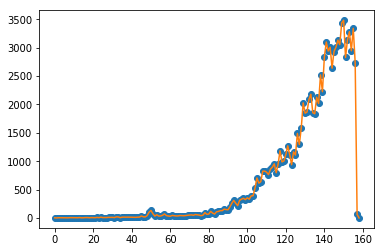

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
import statsmodels.api as sm

# introduce some floats in our x-values
x = list(range(number_of_month))
y = list(df_intensity['volume'])


plt.plot(x, y, 'o')
#plt.plot(lowess_x, lowess_y, '*')
plt.plot(x, y, '-')
plt.show()

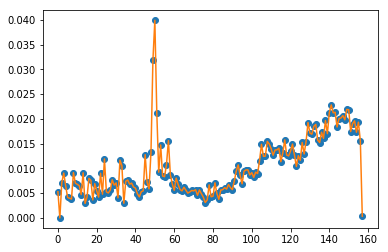

In [22]:
# introduce some floats in our x-values
x = list(range(number_of_month))
y = list(df_intensity['intensity'])


plt.plot(x, y, 'o')
#plt.plot(lowess_x, lowess_y, '*')
plt.plot(x, y, '-')
plt.show()

In [23]:
writer = pd.ExcelWriter('output_lille.xlsx')
df_intensity.to_excel(writer,'Sheet1')
writer.save()